In [ ]:
import numpy as np
import pandas as pd
import sys
from collections import Counter
import matplotlib.pyplot as plt


In [ ]:
sys.path.append('/content/drive/MyDrive/Capstone/Product Recommender system')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/Product Recommender system/sample30.csv')

In [ ]:
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
df.shape

(30000, 15)

In [ ]:
df.isna().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [ ]:
Counter(df['user_sentiment'])

Counter({'Negative': 3367, 'Positive': 26632, nan: 1})

In [ ]:
Counter(df['user_sentiment'][df['reviews_title'].isna()])

Counter({'Negative': 22, 'Positive': 168})

In [ ]:
duplicate = df[df['id'].duplicated()]

In [ ]:
duplicate.shape

(29729, 15)

In [ ]:
#data overview
print('Rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.tolist())
print('\nMissing values: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique() )

Rows:  30000
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing values:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [ ]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [ ]:
df_master = df[['reviews_rating',
       'reviews_text', 'reviews_title','user_sentiment']].copy()

In [ ]:
df_master.head()

,reviews_rating,reviews_text,reviews_title,user_sentiment
0,5,i love this album. it's very good. more to the...,Just Awesome,Positive
1,5,Good flavor. This review was collected as part...,Good,Positive
2,5,Good flavor.,Good,Positive
3,1,I read through the reviews on here before look...,Disappointed,Negative
4,1,My husband bought this gel for us. The gel cau...,Irritation,Negative


In [ ]:
df_master['merged'] = df['reviews_title'] + " " + df['reviews_text']

In [ ]:
df_master['merged'].iloc[0]

"Just Awesome i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [ ]:
df_master.head()

,reviews_rating,reviews_text,reviews_title,user_sentiment,merged
0,5,i love this album. it's very good. more to the...,Just Awesome,Positive,Just Awesome i love this album. it's very good...
1,5,Good flavor. This review was collected as part...,Good,Positive,Good Good flavor. This review was collected as...
2,5,Good flavor.,Good,Positive,Good Good flavor.
3,1,I read through the reviews on here before look...,Disappointed,Negative,Disappointed I read through the reviews on her...
4,1,My husband bought this gel for us. The gel cau...,Irritation,Negative,Irritation My husband bought this gel for us. ...


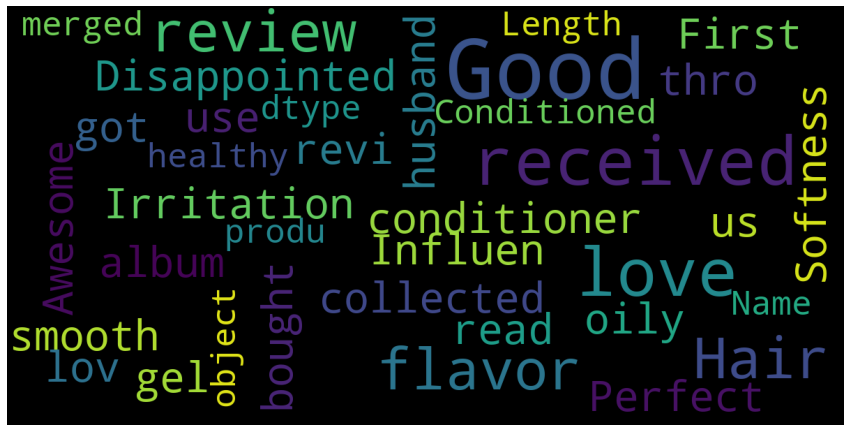

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1 #choose at random
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df_master['merged'])

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_master['newMerged'] = df_master['merged'].str.lower().str.split()

In [ ]:
type(df_master['newMerged'][0])
df_master['newMerged'].head()

0    [just, awesome, i, love, this, album., it's, v...
1    [good, good, flavor., this, review, was, colle...
2                                [good, good, flavor.]
3    [disappointed, i, read, through, the, reviews,...
4    [irritation, my, husband, bought, this, gel, f...
Name: newMerged, dtype: object

In [ ]:
for x in df_master['newMerged'][0]:
  print(x)

just
awesome
i
love
this
album.
it's
very
good.
more
to
the
hip
hop
side
than
her
current
pop
sound..
so
hype!
i
listen
to
this
everyday
at
the
gym!
i
give
it
5star
rating
all
the
way.
her
metaphors
are
just
crazy.


In [ ]:
[item for item in df_master['newMerged'][0] if not item in stop]

['awesome',
 'love',
 'album.',
 'good.',
 'hip',
 'hop',
 'side',
 'current',
 'pop',
 'sound..',
 'hype!',
 'listen',
 'everyday',
 'gym!',
 'give',
 '5star',
 'rating',
 'way.',
 'metaphors',
 'crazy.']

In [ ]:
df_master['newMerged'].apply(lambda x:[item for item in x if not item in stop])

TypeError: ignored

In [ ]:
def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)



In [ ]:
type(df_master['newMerged'][0])

list

In [ ]:
df_master['newMerged'].apply(lambda x:[item for item in x if not item in stop])

TypeError: ignored